### **We are going to firstly demonstrate how Data Augmentation Affects Our Images**

In [14]:
import torch
import numpy as np

import PIL
import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

print('GPU available : {}'.format(torch.cuda.is_available()))
device = 'cuda' if torch.cuda.is_available() else 'cpu'

GPU available : True


In [2]:
transform= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))]) 

# - (0.5,) means subtract the mean value 0.5 from each channel (in this case, there's only one channel since it's grayscale).
# - (0.5,) means divide each channel by the standard deviation of 0.5.  """


In [3]:
trainset = torchvision.datasets.FashionMNIST(root = './data', 
                                             train=True,
                                             download=True,
                                             transform = transform)
testset = torchvision.datasets.FashionMNIST(root = './data', 
                                             train= False,
                                             download=True,
                                             transform = transform)

In [9]:
data_aug_transform = transforms.Compose([
    transforms.RandomAffine(degrees= 10, translate=(0.05, 0.05 ), shear=5),
    transforms.ColorJitter(hue = .05, saturation = .05),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15, interpolation = PIL.Image.BILINEAR),
    transforms.Grayscale(num_output_channels = 1)

])

In [20]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showAugmentations(img, augmentations):
    fig = figure()
    for i in range(augmentations):
        img = data_aug_transform(img)
        fig.add_subplot(1, augmentations, i+1)
        imshow(img, cmap='Greys_r')
        axis('off')

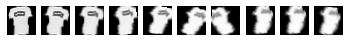

In [25]:
image = trainset.data[1].numpy() # Load the first Image from our training data as a numpy array

img_pil = PIL.Image.fromarray(image) # Convert it to PIL image's format

showAugmentations(img_pil, 10)